# Keras input and dense layers


## Input layers
The first step in creating a neural network model is to define the Input layer. This layer takes in raw data, usually in the form of numpy arrays. The shape of the Input layer defines how many variables your neural network will use. For example, if the input data has 10 columns, you define an Input layer with a shape of (10,).

In this case, you are only using one input in your network.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the Keras Cheat Sheet and keep it handy!

### code

In [1]:
# Import Input from keras.layers
from keras.layers import Input

# Create an input layer of shape 1
input_tensor = Input(shape=(1,))

Using TensorFlow backend.


## Dense layers
Once you have an Input layer, the next step is to add a Dense layer.

Dense layers learn a weight matrix, where the first dimension of the matrix is the dimension of the input data, and the second dimension is the dimension of the output data. Recall that your Input layer has a shape of 1. In this case, your output layer will also have a shape of 1. This means that the Dense layer will learn a 1x1 weight matrix.

In this exercise, you will add a dense layer to your model, after the input layer.

### code

In [2]:
# Load layers
from keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor
output_tensor = output_layer(input_tensor)

## Output layers
Output layers are simply Dense layers! Output layers are used to reduce the dimension of the inputs to the dimension of the outputs. You'll learn more about output dimensions in chapter 4, but for now, you'll always use a single output in your neural networks, which is equivalent to Dense(1) or a dense layer with a single unit.

### code

In [3]:
# Load layers
from keras.layers import Input, Dense

# Input layer
input_tensor = Input(shape=(1,))

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(1)(input_tensor)

# Build and compile a model


## Build a model
Once you've defined an input layer and an output layer, you can build a Keras model. The model object is how you tell Keras where the model starts and stops: where data comes in and where predictions come out.

### code

In [4]:
# Input/dense/output layers
from keras.layers import Input, Dense
input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)

# Build the model
from keras.models import Model
model = Model(input_tensor, output_tensor)

## Compile a model
The final step in creating a model is compiling it. Now that you've created a model, you have to compile it before you can fit it to data. This finalizes your model, freezes all its settings, and prepares it to meet some data!

During compilation, you specify the optimizer to use for fitting the model to the data, and a loss function. 'adam' is a good default optimizer to use, and will generally work well. Loss function depends on the problem at hand. Mean squared error is a common loss function and will optimize for predicting the mean, as is done in least squares regression.

Mean absolute error optimizes for the median and is used in quantile regression. For this dataset, 'mean_absolute_error' works pretty well, so use it as your loss function.

### code

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

## Visualize a model
Now that you've compiled the model, take a look a the result of your hard work! You can do this by looking at the model summary, as well as its plot.

The summary will tell you the names of the layers, as well as how many units they have and how many parameters are in the model.

The plot will show how the layers connect to each other.

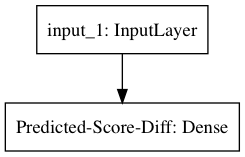

### code

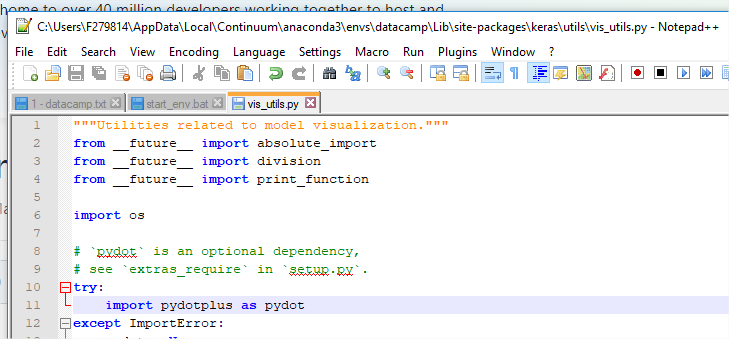

In [6]:
import pydotplus as pydot

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


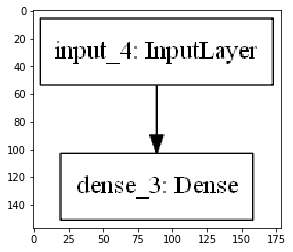

In [8]:
# Import the plotting function
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()

# Plot the model
plot_model(model, to_file='data_from_datacamp\chap1_2.3_model.png')

# Display the image
data = plt.imread('data_from_datacamp\chap1_2.3_model.png')
plt.imshow(data)
plt.show()

# Fit and evaluate a model


## Fit the model to the tournament basketball data
Now that the model is compiled, you are ready to fit it to some data!

In this exercise, you'll use a dataset of scores from US College Basketball tournament games. Each row of the dataset has the team ids: team_1 and team_2, as integers. It also has the seed difference between the teams (seeds are assigned by the tournament committee and represent a ranking of how strong the teams are) and the score difference of the game (e.g. if team_1 wins by 5 points, the score difference is 5).

To fit the model, you provide a matrix of X variables (in this case one column: the seed difference) and a matrix of Y variables (in this case one column: the score difference).

The games_tourney DataFrame along with the compiled model object is available in your workspace.

### init

In [13]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(games_tourney, model, games_tourney_train)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'games_tourney.csv': 'https://file.io/jSujeJ',
  'games_tourney_train.csv': 'https://file.io/Zchd2D'},
 keras.engine.training.Model: {'model.h5': 'https://file.io/mMxdJx'}}
"""
prefix='data_from_datacamp/Chap1-Exercise3.1_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
games_tourney = pd.read_csv(prefix+'games_tourney.csv',index_col=0)
games_tourney_train = pd.read_csv(prefix+'games_tourney_train.csv',index_col=0)
from downloadfromFileIO import loadModelFromH5
model = loadModelFromH5(prefix+'model.h5')



Téléchargements à lancer

{pandas.core.frame.DataFrame: {"games_tourney.csv": "https://file.io/jSujeJ",
  "games_tourney_train.csv": "https://file.io/Zchd2D"},
 keras.engine.training.Model: {"model.h5": "https://file.io/mMxdJx"}}

{'pandas.core.frame.DataFrame': {'games_tourney.csv': 'https://file.io/jSujeJ', 'games_tourney_train.csv': 'https://file.io/Zchd2D'}, 'keras.engine.training.Model': {'model.h5': 'https://file.io/mMxdJx'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 76800    0 76800    0     0  90140      0 --:--:-- --:--:-- --:--:-- 90140
100  146k    0  146k    0     0   164k      0 --:--:-- --:--:-- --:--:--  164k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0

### code

In [14]:
# Now fit the model
model.fit(games_tourney_train['seed_diff'], games_tourney_train['score_diff'],
          epochs=1,
          batch_size=128,
          validation_split=0.1,
          verbose=True)



Train on 3087 samples, validate on 343 samples
Epoch 1/1
3087/3087 [==============================] - 0s 48us/step - loss: 12.6628 - val_loss: 11.8755


## Evaluate the model on a test set
After fitting the model, you can evaluate it on new data. You will give the model a new X matrix (also called test data), allow it to make predictions, and then compare to the known y variable (also called target data).

In this case, you'll use data from the post-season tournament to evaluate your model. The tournament games happen after the regular season games you used to train our model, and are therefore a good evaluation of how well your model performs out-of-sample.

The games_tourney_test DataFrame along with the fitted model object is available in your workspace.

### init

In [15]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(games_tourney_test)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'games_tourney_test.csv': 'https://file.io/f5p6dA'}}
"""
prefix='data_from_datacamp/Chap1-Exercise3.2_'
saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

import pandas as pd
games_tourney_test = pd.read_csv(prefix+'games_tourney_test.csv',index_col=0)



Téléchargements à lancer

{pandas.core.frame.DataFrame: {"games_tourney_test.csv": "https://file.io/f5p6dA"}}

{'pandas.core.frame.DataFrame': {'games_tourney_test.csv': 'https://file.io/f5p6dA'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 28850    0 28850    0     0  21578      0 --:--:--  0:00:01 --:--:-- 21594


### code

In [16]:
# Load the X variable from the test data
X_test = games_tourney_test['seed_diff']

# Load the y variable from the test data
y_test = games_tourney_test['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test, verbose=False))

11.967303418401462
